<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Capstone Part 8:** Data Normalization Techniques


#### Student Author: Abigail Hedden

## Objectives


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Set-up


In [14]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

### Load in the dataset

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Handling Duplicates
#### Identify and remove duplicate rows.


In [3]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())
# there are no duplicate rows

Number of duplicate rows: 0


### Handling Missing Values
#### Identify missing values in `CodingActivities`.


In [4]:
# Check missing values in 'CodingActivities'
missing_count = df['CodingActivities'].isnull().sum()
print("Missing values in CodingActivities:", missing_count)

Missing values in CodingActivities: 10971


#### Impute missing values in CodingActivities with forward-fill.


In [5]:
# forward-fill missing values in 'CodingActivities'
df['CodingActivities'] = df['CodingActivities'].fillna(method='ffill')

# verify no missing data
missing_count = df['CodingActivities'].isnull().sum()
print("Missing values in CodingActivities:", missing_count)

Missing values in CodingActivities: 0


#### Ensure that any missing values (NaN) in the `ConvertedCompYearly` column are handled appropriately.

In [7]:
# find mode for ConvertedCompYearly
mode_conv_comp = df['ConvertedCompYearly'].mode()[0]
print('mode=', mode_conv_comp)

# impute missing values
df['ConvertedCompYearly'].fillna(mode_conv_comp, inplace=True)

# verify no missing data
missing_count = df['ConvertedCompYearly'].isnull().sum()
print("Missing values in ConvertedCompYearly:", missing_count)

mode= 64444.0
Missing values in ConvertedCompYearly: 0


### Normalizing Compensation Data
#### Identify compensation-related columns, such as ConvertedCompYearly.

In [10]:
# find columns related to compensation
comp_cols = [col for col in df.columns if 'Comp' in col]
# remove AIComplex
comp_cols = ['CompTotal', 'ConvertedCompYearly']
print("Compensation-related columns:", comp_cols)

Compensation-related columns: ['CompTotal', 'ConvertedCompYearly']


#### Normalize ConvertedCompYearly using Min-Max Scaling
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, apply Min-Max normalization to the `ConvertedCompYearly` column, creating a new column `ConvertedCompYearly_MinMax` with normalized values.

In [13]:
# Min-Max scaling
scaler = MinMaxScaler()
df['ConvertedCompYearly_MinMax'] = scaler.fit_transform(df[['ConvertedCompYearly']])

print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())

   ConvertedCompYearly  ConvertedCompYearly_MinMax
0              64444.0                    0.003964
1              64444.0                    0.003964
2              64444.0                    0.003964
3              64444.0                    0.003964
4              64444.0                    0.003964


#### Apply Z-score Normalization to `ConvertedCompYearly`

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, calculate Z-scores for the `ConvertedCompYearly` column, saving the results in a new column `ConvertedCompYearly_Zscore`.


In [15]:
# Z-score normalization
df['ConvertedCompYearly_Zscore'] = zscore(df['ConvertedCompYearly'])

print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head())

   ConvertedCompYearly  ConvertedCompYearly_Zscore
0              64444.0                   -0.069273
1              64444.0                   -0.069273
2              64444.0                   -0.069273
3              64444.0                   -0.069273
4              64444.0                   -0.069273


### Visualization of Normalized Data
#### Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


99th percentile of ConvertedCompYearly: 250000.0


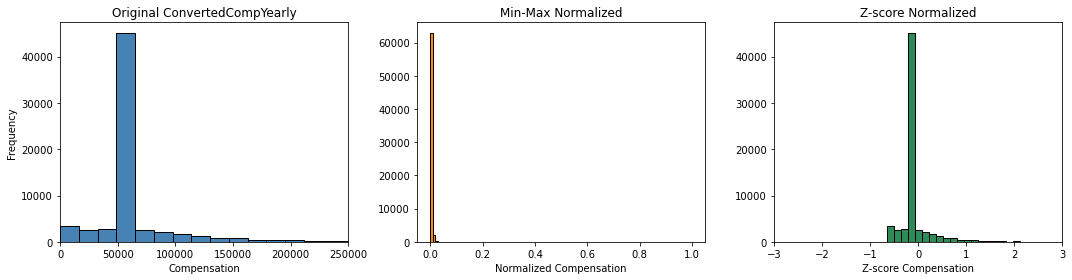

In [27]:
# due to the extrememly large range of the column and outliers, check 99th percentile of `ConvertedCompYearly` to aid in visualization
conv_comp_q99 = df['ConvertedCompYearly'].quantile(0.99)
print(f"99th percentile of ConvertedCompYearly: {conv_comp_q99}")

plt.figure(figsize=(15, 4))

# Original
plt.subplot(1, 3, 1)
plt.hist(df['ConvertedCompYearly'], bins=1000, color='steelblue', edgecolor='k')
plt.title('Original ConvertedCompYearly')
plt.xlabel('Compensation')
plt.ylabel('Frequency')
plt.xlim(0, conv_comp_q99) # adjust range based on 99th percentile for better visualization

# Min-Max Normalized
plt.subplot(1, 3, 2)
plt.hist(df['ConvertedCompYearly_MinMax'], bins=100, color='darkorange', edgecolor='k')
plt.title('Min-Max Normalized')
plt.xlabel('Normalized Compensation')

# Z-score Normalized
plt.subplot(1, 3, 3)
plt.hist(df['ConvertedCompYearly_Zscore'], bins=1000, color='seagreen', edgecolor='k')
plt.title('Z-score Normalized')
plt.xlabel('Z-score Compensation')
plt.xlim(-3, 3) # 99.7% of normal distribution

plt.tight_layout()
plt.show()

# can clearly see that some normalization methods may not be as appropriate

### Summary


Copyright © IBM Corporation. All rights reserved.
